# heat_load_calcの結果ファイルを読み込み、簡単なポスト処理を行う

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
dd_i = pd.read_csv('result/result_detail_i.csv')
dd_a = pd.read_csv('result/result_detail_a.csv')

## 代表日のグラフ

C:\Users\satoh\AppData\Local\Temp\ipykernel_12236\743287221.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd_t['start_time'] = pd.to_datetime(dd_t['start_time'])
C:\Users\satoh\AppData\Local\Temp\ipykernel_12236\743287221.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd_rh['start_time'] = pd.to_datetime(dd_rh['start_time'])
C:\Users\satoh\AppData\Local\Temp\ipykernel_12236\743287221.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

<AxesSubplot:xlabel='end_time'>

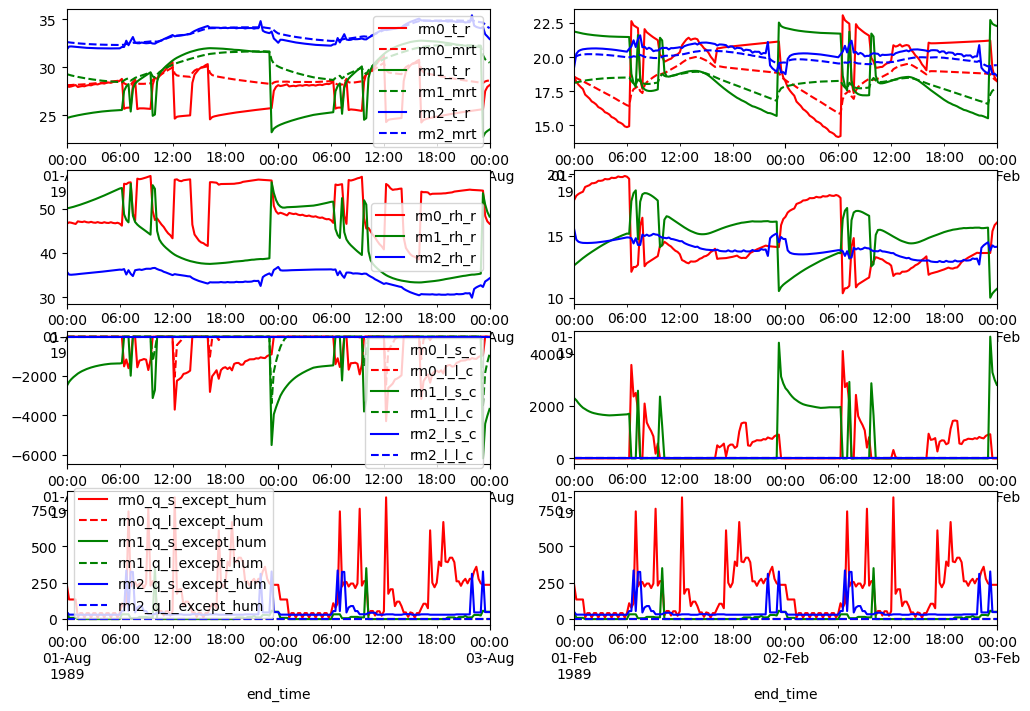

In [3]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

summer1 = dt.datetime(1989, 8, 1)
summer2 = dt.datetime(1989, 8, 3)
winter1 = dt.datetime(1989, 2, 1)
winter2 = dt.datetime(1989, 2, 3)

# 室温とMRTのグラフ
dd_t = dd_i.filter(regex='(start_time|_t_r|_mrt)', axis=1)
dd_t['start_time'] = pd.to_datetime(dd_t['start_time'])
dd_t_summer = dd_t[(dd_t['start_time'] >= summer1) & (dd_t['start_time'] <= summer2)]
dd_t_summer = dd_t_summer.set_index('start_time')
dd_t_summer.plot(ax=axes[0, 0], style=['r', 'r--', 'g', 'g--', 'b', 'b--'], kind='line')
dd_t_winter = dd_t[(dd_t['start_time'] >= winter1) & (dd_t['start_time'] <= winter2)]
dd_t_winter = dd_t_winter.set_index('start_time')
dd_t_winter.plot(ax=axes[0, 1], style=['r', 'r--', 'g', 'g--', 'b', 'b--'], kind='line', legend=False)

# 相対湿度
dd_rh = dd_i.filter(regex='(start_time|_rh_r)', axis=1)
dd_rh['start_time'] = pd.to_datetime(dd_rh['start_time'])
dd_rh_summer = dd_rh[(dd_rh['start_time'] >= summer1) & (dd_rh['start_time'] <= summer2)]
dd_rh_summer = dd_rh_summer.set_index('start_time')
dd_rh_summer.plot(ax=axes[1, 0], style=['r', 'g', 'b'], kind='line')
dd_rh_winter = dd_rh[(dd_rh['start_time'] >= winter1) & (dd_rh['start_time'] <= winter2)]
dd_rh_winter = dd_rh_winter.set_index('start_time')
dd_rh_winter.plot(ax=axes[1, 1], style=['r', 'g', 'b'], kind='line', legend=False)

# 熱負荷
dd_l = dd_a.filter(regex='(end_time|_l_s_c|_l_l_c)', axis=1)
dd_l['end_time'] = pd.to_datetime(dd_l['end_time'])
dd_l_summer = dd_l[(dd_l['end_time'] >= summer1) & (dd_l['end_time'] <= summer2)]
dd_l_summer = dd_l_summer.set_index('end_time')
dd_l_summer.plot(ax=axes[2, 0], style=['r', 'r--', 'g', 'g--', 'b', 'b--'], kind='line')
dd_l_winter = dd_l[(dd_l['end_time'] >= winter1) & (dd_l['end_time'] <= winter2)]
dd_l_winter = dd_l_winter.set_index('end_time')
dd_l_winter.plot(ax=axes[2, 1], style=['r', 'r--', 'g', 'g--', 'b', 'b--'], kind='line', legend=False)

# 内部発熱
dd_q = dd_a.filter(regex='(end_time|_q_s_except_hum|_q_l_except_hum)', axis=1)
dd_q['end_time'] = pd.to_datetime(dd_q['end_time'])
dd_q_summer = dd_q[(dd_q['end_time'] >= summer1) & (dd_q['end_time'] <= summer2)]
dd_q_summer = dd_q_summer.set_index('end_time')
dd_q_summer.plot(ax=axes[3, 0], style=['r', 'r--', 'g', 'g--', 'b', 'b--'], kind='line')
dd_q_winter = dd_q[(dd_q['end_time'] >= winter1) & (dd_q['end_time'] <= winter2)]
dd_q_winter = dd_q_winter.set_index('end_time')
dd_q_winter.plot(ax=axes[3, 1], style=['r', 'r--', 'g', 'g--', 'b', 'b--'], kind='line', legend=False)

## 月集計値のグラフ

C:\Users\satoh\AppData\Local\Temp\ipykernel_12236\2455260962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd_l_month['month'] = range(1, 14)


array([[<AxesSubplot:title={'center':'rm0_l_s_c'}, xlabel='month'>,
        <AxesSubplot:title={'center':'rm0_l_l_c'}, xlabel='month'>],
       [<AxesSubplot:title={'center':'rm1_l_s_c'}, xlabel='month'>,
        <AxesSubplot:title={'center':'rm1_l_l_c'}, xlabel='month'>],
       [<AxesSubplot:title={'center':'rm2_l_s_c'}, xlabel='month'>,
        <AxesSubplot:title={'center':'rm2_l_l_c'}, xlabel='month'>]],
      dtype=object)

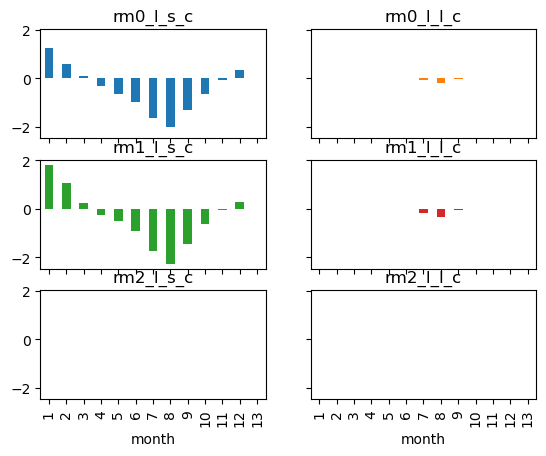

In [4]:
dd_a['end_time'] = pd.to_datetime(dd_a['end_time'])
dd_a = dd_a.set_index('end_time')
dd_a_month = dd_a.resample('M').sum() * 900.0 / 1.0e9
dd_l_month = dd_a_month.filter(regex='(end_time|_l_s_c|_l_l_c)', axis=1)
dd_l_month['month'] = range(1, 14)
dd_l_month = dd_l_month.set_index('month')
dd_l_month.plot(kind='bar', subplots=True, layout=(3, 2), sharex=True, sharey=True, legend=False)